# ESTUDIO DE EFICIENCIA DE PLANTA SOLAR (parte I)

## Objetivo

En este notebook elaboramos los datos para estudiar la eficiencia de una planta solar

Usaremos técnica de Downsamplig para crear DataFrame más apropiado para el estudio.    

## Opciones y paquetes

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config IPCompleter.greedy = True

pd.options.display.float_format= '{:15.2f}'.format

## Importación de datos

In [86]:
pd.read_pickle('Datos/df.pickle')

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,mes,dia,hora,minuto,eficiencia,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00,6,17,23,45


In [87]:
# Vamos a guardarlo dentro de un DF que lo llamamos df:
df = pd.read_pickle('Datos/df.pickle')
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,mes,dia,hora,minuto,eficiencia,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00,6,17,23,45


In [88]:
# Comprobamos el tema de fecha y datetime como índice para ver que respeta el cambio que hicimos:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   planta       136472 non-null  object 
 1   inverter_id  136472 non-null  object 
 2   kw_dc        136472 non-null  float64
 3   kw_ac        136472 non-null  float64
 4   kw_dia       136472 non-null  float64
 5   kw_total     136472 non-null  float64
 6   sensor_id    136472 non-null  object 
 7   t_ambiente   136472 non-null  float64
 8   t_modulo     136472 non-null  float64
 9   irradiacion  136472 non-null  float64
 10  mes          136472 non-null  int32  
 11  dia          136472 non-null  int32  
 12  hora         136472 non-null  int32  
 13  minuto       136472 non-null  int32  
 14  eficiencia   136472 non-null  float64
 15  mes          136472 non-null  int32  
 16  dia          136472 non-null  int32  
 17  hora         136472 non-null  int

# Creando variables a partir de la fecha

La primera variable que tenemos que crear en un proyecto de este tipo son las de los componentes de la fecha

Extraer mes, dia, horas, minutos. Es frecuente en proyectos que incluyen tiempo y lo mejor es hacer una función:

In [89]:
def componentes_fecha(dataframe):
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute

    return(pd.DataFrame({'mes':mes,'dia':dia,'hora':hora,'minuto':minuto}))

In [90]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
componentes_fecha(df)

,mes,dia,hora,minuto
0,5,15,0,0
1,5,15,0,0
2,5,15,0,0
3,5,15,0,0
4,5,15,0,0
...,...,...,...,...
136467,6,17,23,45
136468,6,17,23,45
136469,6,17,23,45
136470,6,17,23,45


Ahora tenemos queintegrar este df que nos está generando esta función con nuestro df original:

La manera seria uniendo con concat()

In [92]:
pd.concat([df.reset_index(),componentes_fecha(df)], axis = 1)

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,...,minuto,eficiencia,mes,dia,hora,minuto,mes,dia,hora,minuto
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,...,0,0.00,5,15,0,0,5,15,0,0
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,...,0,0.00,5,15,0,0,5,15,0,0
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,...,0,0.00,5,15,0,0,5,15,0,0
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,...,0,0.00,5,15,0,0,5,15,0,0
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,...,0,0.00,5,15,0,0,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136467,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,...,45,0.00,6,17,23,45,6,17,23,45
136468,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,...,45,0.00,6,17,23,45,6,17,23,45
136469,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,...,45,0.00,6,17,23,45,6,17,23,45
136470,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,...,45,0.00,6,17,23,45,6,17,23,45


Vemos que tenemos el dataset original al que ha añadido 4 columnas.

In [93]:
# Volvemos a ponerle el indice fecha y lo guardamos como df:
df = pd.concat([df.reset_index(),componentes_fecha(df)], axis = 1).set_index('fecha')
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,...,minuto,eficiencia,mes,dia,hora,minuto,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,...,45,0.00,6,17,23,45,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,...,45,0.00,6,17,23,45,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,...,45,0.00,6,17,23,45,6,17,23,45


# Creando variables con denominador cero

Existe un método para rellenar los nulos aplicando .fillna(0) y los reemplaza directamente.

In [94]:
def eficiencia_inverter(AC,DC) :
    temp = AC / DC *100
    return(temp.fillna(0))

In [95]:
# Una vez creada la función creamos la nueva variable:

df['eficiencia'] = eficiencia_inverter (df.kw_ac, df.kw_dc)

In [96]:
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,...,minuto,eficiencia,mes,dia,hora,minuto,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,...,0,0.00,5,15,0,0,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,...,45,0.00,6,17,23,45,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,...,45,0.00,6,17,23,45,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,...,45,0.00,6,17,23,45,6,17,23,45


In [97]:
# Revisamos si la variable aha creado algún nulo con la variable
df.eficiencia.isna().sum()

0

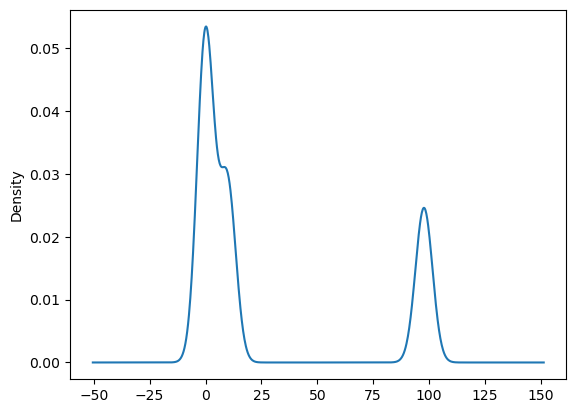

In [98]:
df.eficiencia.plot.kde() ;

In [99]:
df.eficiencia.describe().T

count         136472.00
mean              25.57
std               40.15
min                0.00
25%                0.00
50%                9.65
75%                9.82
max              100.83
Name: eficiencia, dtype: float64

Mínimo marca bien

Máximo vimos que habia alguna situación que AC marca mas que DC no lo entendemos pero de momento no le damos más importancia

Lo importante es que hay dos distribuciones, seguramente cada una sea cada planta

In [107]:
df = df.loc[:, ~df.columns.duplicated()]

En principio tenemos un DF bastante completo de variables

Deberíamos ordenar las columnas del DF en base al proceso

In [108]:
orden = ['planta','mes','dia','hora','minuto','sensor_id','irradiacion','t_ambiente','t_modulo','inverter_id','kw_dc','kw_ac','eficiencia','kw_dia','kw_total']

In [109]:
df[orden]

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00


In [111]:
df = df.loc[:, ~df.columns.duplicated()]
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,mes,dia,hora,minuto,eficiencia
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00


In [112]:
orden = ['planta','mes','dia','hora','minuto','sensor_id','irradiacion','t_ambiente','t_modulo','inverter_id','kw_dc','kw_ac','eficiencia','kw_dia','kw_total']

In [114]:
df = df[orden]
df

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00


### 1.5 DF_DIARIO_Crear un DF a nivel diario mediante DOWNSAMPLING

Actualmente tenemos un Dataset que trabaja a nivel de 15 min y queremos uno superior, a nivel diario con la misma información

Primero es ver por qué variables queremos agregar: por planta y por inverter. Hacer un groupby

Y anular esa ventana de 15 min mediante un resample

In [115]:
df.columns

Index(['planta', 'mes', 'dia', 'hora', 'minuto', 'sensor_id', 'irradiacion',
       't_ambiente', 't_modulo', 'inverter_id', 'kw_dc', 'kw_ac', 'eficiencia',
       'kw_dia', 'kw_total'],
      dtype='object')

In [120]:
df.groupby(['planta', 'inverter_id']).resample('D').agg({
          'irradiacion':[min,np.mean,max],
          't_ambiente':[min,np.mean,max],
          't_modulo':[min,np.mean,max],
          'kw_dc':[min,np.mean,max,sum],
          'kw_ac':[min,np.mean,max,sum],
          'eficiencia':[min,np.mean,max],
          'kw_dia':max,
          'kw_total':max
    })

irradiacion                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                       2020-05-16            0.00            0.21   
                       2020-05-17            0.00            0.24   
                       2020-05-18            0.00            0.16   
                       2020-05-19            0.00            0.19   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.00            0.22   
                       2020-06-14            0.00            0.23   
                       2020-06-15            0.00            0.19   
                       2020-06-16            0.00            0.17   
                       2020-06-17            0.00            0.12   

                                                       t_ambiente  \
                                              max             min   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                       2020-05-16            0.81           21.50   
                       2020-05-17            1.00           21.21   
                       2020-05-18            0.97           20.96   
                       2020-05-19            0.84           22.39   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.93           22.20   
                       2020-06-14            0.92           23.65   
                       2020-06-15            0.83           24.00   
                       2020-06-16            0.77           23.63   
                       2020-06-17            0.58           22.55   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                       2020-05-16           26.78           32.52   
                       2020-05-17           26.69           35.25   
                       2020-05-18           23.85           28.37   
                       2020-05-19           25.34           30.37   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                       2020-06-14           27.02           32.96   
                       2020-06-15           26.56           31.61   
                       2020-06-16           26.37           30.83   
                       2020-06-17           24.85           29.04   

                                         t_modulo                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                                            kw_dc  ...  \
                                              max             min  ...   
planta inverter_id    

Como vemos la está devolviendo con multiindex

Lo guardamos dentro de DF df_dia:

In [121]:
df_dia = df.groupby(['planta', 'inverter_id']).resample('D').agg({
          'irradiacion':[min,np.mean,max],
          't_ambiente':[min,np.mean,max],
          't_modulo':[min,np.mean,max],
          'kw_dc':[min,np.mean,max,sum],
          'kw_ac':[min,np.mean,max,sum],
          'eficiencia':[min,np.mean,max],
          'kw_dia':max,
          'kw_total':max})
df_dia

irradiacion                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                       2020-05-16            0.00            0.21   
                       2020-05-17            0.00            0.24   
                       2020-05-18            0.00            0.16   
                       2020-05-19            0.00            0.19   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.00            0.22   
                       2020-06-14            0.00            0.23   
                       2020-06-15            0.00            0.19   
                       2020-06-16            0.00            0.17   
                       2020-06-17            0.00            0.12   

                                                       t_ambiente  \
                                              max             min   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                       2020-05-16            0.81           21.50   
                       2020-05-17            1.00           21.21   
                       2020-05-18            0.97           20.96   
                       2020-05-19            0.84           22.39   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.93           22.20   
                       2020-06-14            0.92           23.65   
                       2020-06-15            0.83           24.00   
                       2020-06-16            0.77           23.63   
                       2020-06-17            0.58           22.55   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                       2020-05-16           26.78           32.52   
                       2020-05-17           26.69           35.25   
                       2020-05-18           23.85           28.37   
                       2020-05-19           25.34           30.37   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                       2020-06-14           27.02           32.96   
                       2020-06-15           26.56           31.61   
                       2020-06-16           26.37           30.83   
                       2020-06-17           24.85           29.04   

                                         t_modulo                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                                            kw_dc  ...  \
                                              max             min  ...   
planta inverter_id    

### Eliminar multiindice de las columnas

Eliminamos ahora el multiíndex de las columnas

Pandas tiene to flat index()

In [123]:
df_dia.columns.to_flat_index()

Index([ ('irradiacion', 'min'), ('irradiacion', 'mean'),
        ('irradiacion', 'max'),   ('t_ambiente', 'min'),
        ('t_ambiente', 'mean'),   ('t_ambiente', 'max'),
           ('t_modulo', 'min'),    ('t_modulo', 'mean'),
           ('t_modulo', 'max'),        ('kw_dc', 'min'),
             ('kw_dc', 'mean'),        ('kw_dc', 'max'),
              ('kw_dc', 'sum'),        ('kw_ac', 'min'),
             ('kw_ac', 'mean'),        ('kw_ac', 'max'),
              ('kw_ac', 'sum'),   ('eficiencia', 'min'),
        ('eficiencia', 'mean'),   ('eficiencia', 'max'),
             ('kw_dia', 'max'),     ('kw_total', 'max')],
      dtype='object')

In [124]:
# Los guardamos como tuplas:
tuplas = df_dia.columns.to_flat_index()
tuplas

Index([ ('irradiacion', 'min'), ('irradiacion', 'mean'),
        ('irradiacion', 'max'),   ('t_ambiente', 'min'),
        ('t_ambiente', 'mean'),   ('t_ambiente', 'max'),
           ('t_modulo', 'min'),    ('t_modulo', 'mean'),
           ('t_modulo', 'max'),        ('kw_dc', 'min'),
             ('kw_dc', 'mean'),        ('kw_dc', 'max'),
              ('kw_dc', 'sum'),        ('kw_ac', 'min'),
             ('kw_ac', 'mean'),        ('kw_ac', 'max'),
              ('kw_ac', 'sum'),   ('eficiencia', 'min'),
        ('eficiencia', 'mean'),   ('eficiencia', 'max'),
             ('kw_dia', 'max'),     ('kw_total', 'max')],
      dtype='object')

Tenemos aquí un index, no un multiindex, donde tenemos por cada elemento una tupla, con la variable y el estadístico

Queremos tener una lista con la unión de esos dos elementos y con nombre claro

El método que recorre lista es list_comprenhension y hace lo que queremos hacer:

In [125]:
['_'.join(par) for par in tuplas]

['irradiacion_min',
 'irradiacion_mean',
 'irradiacion_max',
 't_ambiente_min',
 't_ambiente_mean',
 't_ambiente_max',
 't_modulo_min',
 't_modulo_mean',
 't_modulo_max',
 'kw_dc_min',
 'kw_dc_mean',
 'kw_dc_max',
 'kw_dc_sum',
 'kw_ac_min',
 'kw_ac_mean',
 'kw_ac_max',
 'kw_ac_sum',
 'eficiencia_min',
 'eficiencia_mean',
 'eficiencia_max',
 'kw_dia_max',
 'kw_total_max']

In [126]:
# Hacemos asignación a los nombre del DF:
df_dia.columns = ['_'.join(par) for par in tuplas]
df_dia

irradiacion_min  irradiacion_mean  \
planta inverter_id     fecha                                           
p1     1BY6WEcLGh8j5v7 2020-05-15             0.00              0.20   
                       2020-05-16             0.00              0.21   
                       2020-05-17             0.00              0.24   
                       2020-05-18             0.00              0.16   
                       2020-05-19             0.00              0.19   
...                                            ...               ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.00              0.22   
                       2020-06-14             0.00              0.23   
                       2020-06-15             0.00              0.19   
                       2020-06-16             0.00              0.17   
                       2020-06-17             0.00              0.12   

                                   irradiacion_max  t_ambiente_min  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15             0.89           22.04   
                       2020-05-16             0.81           21.50   
                       2020-05-17             1.00           21.21   
                       2020-05-18             0.97           20.96   
                       2020-05-19             0.84           22.39   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.93           22.20   
                       2020-06-14             0.92           23.65   
                       2020-06-15             0.83           24.00   
                       2020-06-16             0.77           23.63   
                       2020-06-17             0.58           22.55   

                                   t_ambiente_mean  t_ambiente_max  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15            27.43           34.43   
                       2020-05-16            26.78           32.52   
                       2020-05-17            26.69           35.25   
                       2020-05-18            23.85           28.37   
                       2020-05-19            25.34           30.37   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            26.12           31.91   
                       2020-06-14            27.02           32.96   
                       2020-06-15            26.56           31.61   
                       2020-06-16            26.37           30.83   
                       2020-06-17            24.85           29.04   

                                     t_modulo_min   t_modulo_mean  \
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                     t_modulo_max       kw_dc_min  ...  \
planta inverter_id     fecha                                       ...   
p1     1BY6WEcLGh8j5v7 2020-05-15           55.03            0.00  ...   
                       2020-05-16           54.23            0.00  ...   
                       2020-05-17           63.15            0.00  ...   
        

Ahora tenemos el DF aplanado y esta estructura es muy útil en muchas situaciones.

### Guardamos los DF

In [128]:
df_dia = df_dia.reset_index().set_index('fecha')
df_dia

,planta,inverter_id,irradiacion_min,irradiacion_mean,irradiacion_max,t_ambiente_min,t_ambiente_mean,t_ambiente_max,t_modulo_min,t_modulo_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,eficiencia_min,eficiencia_mean,eficiencia_max,kw_dia_max,kw_total_max
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,p2,xoJJ8DcxJEcupym,0.00,0.22,0.93,22.20,26.12,31.91,20.88,30.39,...,27443.74,0.00,279.59,1239.95,26840.58,0.00,51.91,98.29,6632.00,209312200.00
2020-06-14,p2,xoJJ8DcxJEcupym,0.00,0.23,0.92,23.65,27.02,32.96,22.12,31.59,...,30768.78,0.00,313.43,1328.21,30088.97,0.00,51.94,99.92,7268.00,209319687.00
2020-06-15,p2,xoJJ8DcxJEcupym,0.00,0.19,0.83,24.00,26.56,31.61,23.00,30.00,...,25597.24,0.00,260.93,1256.67,25049.49,0.00,52.94,98.27,7412.67,209325949.00


In [130]:
df.to_pickle('Datos/df.pickle')
df_dia.to_pickle('Datos/df_dia.pickle')